In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Flight_Booking.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


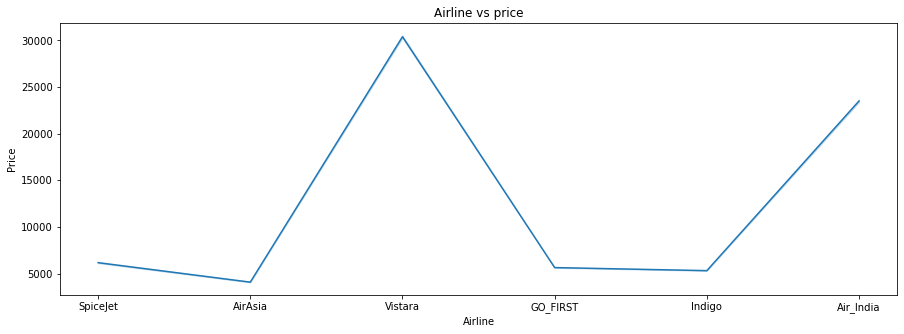

In [5]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airline vs price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

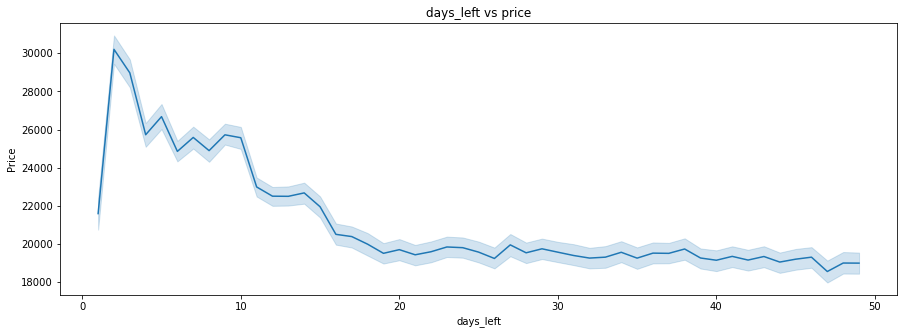

In [6]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['days_left'],y=df['price'])
plt.title('days_left vs price')
plt.xlabel('days_left')
plt.ylabel('Price')
plt.show()

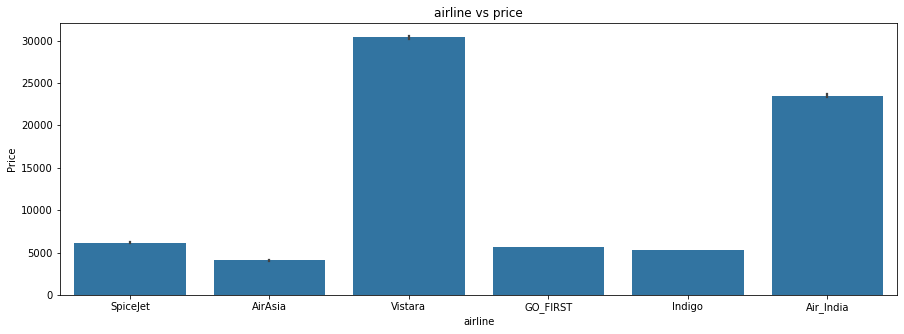

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(x='airline',y='price',data=df)
plt.title('airline vs price')
plt.xlabel('airline')
plt.ylabel('Price')
plt.show()

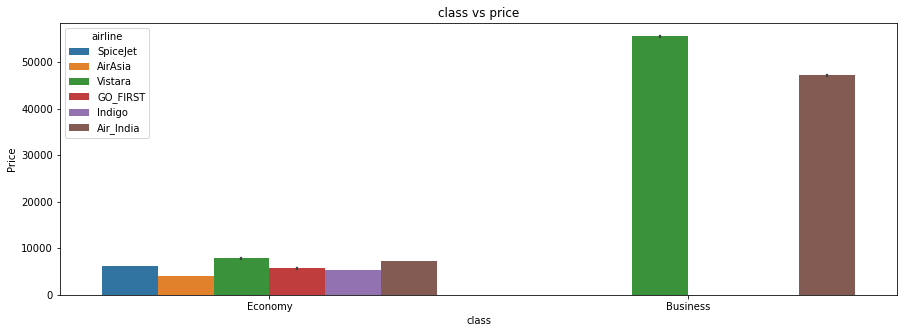

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x='class',y='price',data=df,hue='airline')
plt.title('class vs price')
plt.xlabel('class')
plt.ylabel('Price')
plt.show()

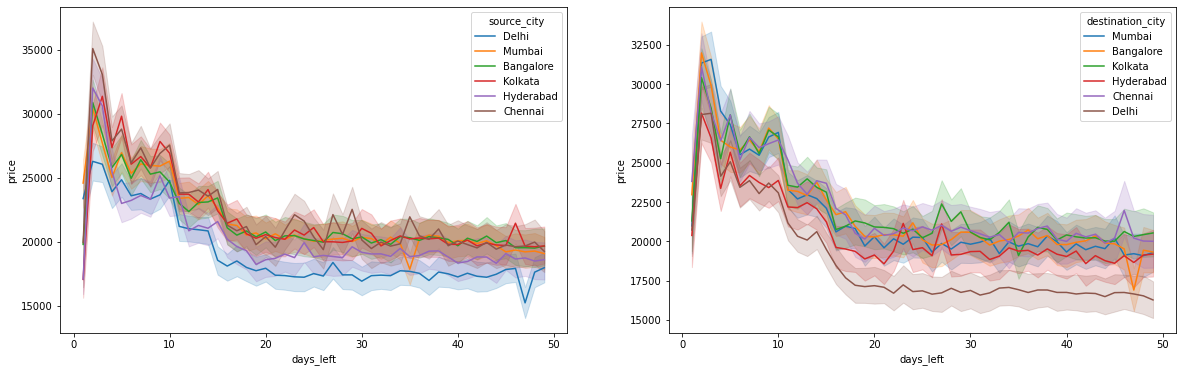

In [9]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

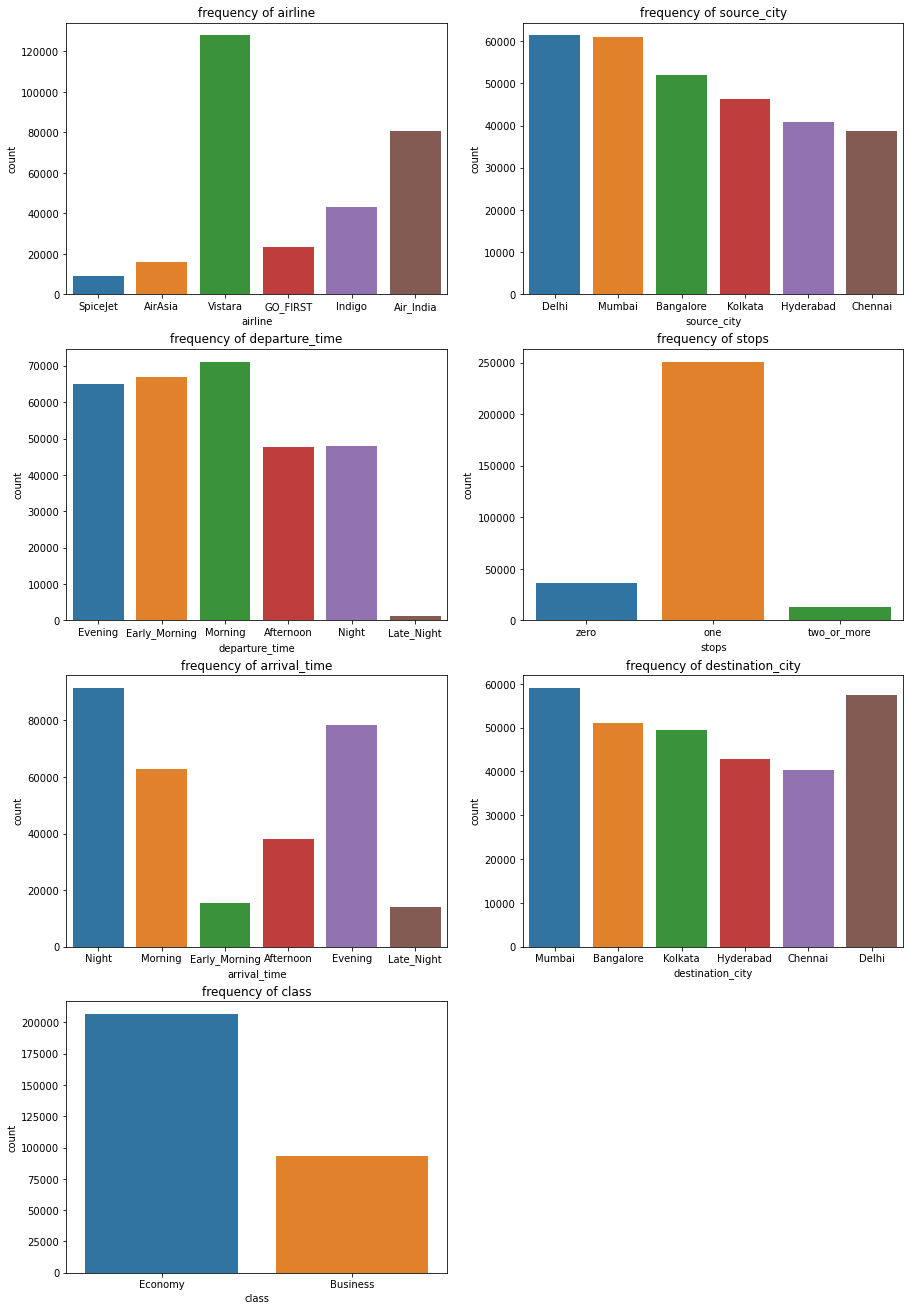

In [10]:
plt.figure(figsize=(15,23))
plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df,hue='airline')
plt.title('frequency of airline')


plt.subplot(4,2,2)
sns.countplot(x=df['source_city'],data=df,hue='source_city')
plt.title('frequency of source_city')

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'],data=df,hue='departure_time')
plt.title('frequency of departure_time')

plt.subplot(4,2,4)
sns.countplot(x=df['stops'],data=df,hue='stops')
plt.title('frequency of stops')

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'],data=df,hue='arrival_time')
plt.title('frequency of arrival_time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'],data=df,hue='destination_city')
plt.title('frequency of destination_city')

plt.subplot(4,2,7)
sns.countplot(x=df['class'],data=df,hue='class')
plt.title('frequency of class')

plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
col=['airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class']
for i in col:
    df[i]=le.fit_transform(df[i])

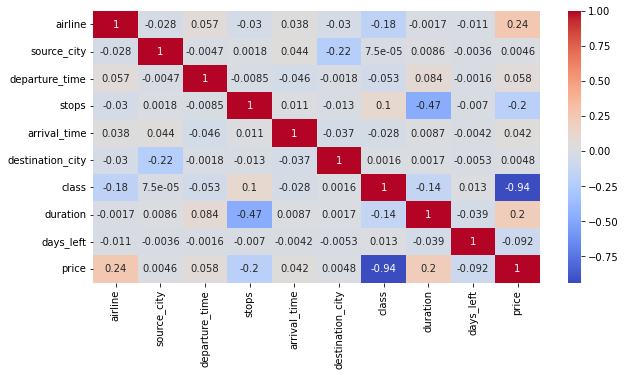

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
    if ((df[col].dtype!='object') & (col!='price')):
        col_list.append(col)

x=df[col_list]
vif=pd.DataFrame()
vif['feature']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) 
            for i in range(len(x.columns))]

In [15]:
vif

,feature,VIF
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


In [16]:
col=['flight','price']
x=df.drop(columns=col)
y=df['price']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# LinearRegression

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [34]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [35]:
r2=r2_score(y_test,y_pred)
r2

0.904554350718816

In [37]:
mae=mean_absolute_error(y_test,y_pred)
mae

4624.9948680168745

In [38]:
mse=mean_squared_error(y_test,y_pred)
mse

49200540.293721996

C:\Users\hp\AppData\Local\Temp\ipykernel_9532\4020202448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
C:\Users\hp\AppData\Local\Temp\ipykernel_9532\4020202448.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted')


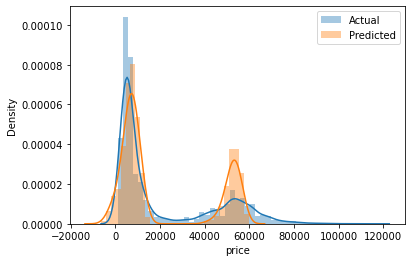

In [42]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

# DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [45]:
r2=r2_score(y_test,y_pred)
r2

0.9753362209806221

In [46]:
mae=mean_absolute_error(y_test,y_pred)
mae

1177.3089625915502

In [47]:
mse=mean_squared_error(y_test,y_pred)
mse

12713740.883709159

C:\Users\hp\AppData\Local\Temp\ipykernel_9532\4020202448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
C:\Users\hp\AppData\Local\Temp\ipykernel_9532\4020202448.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted')


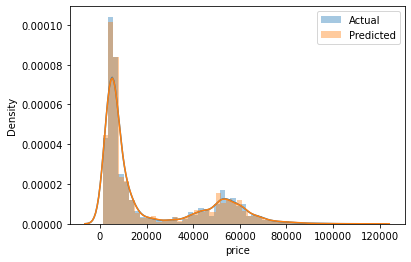

In [48]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [50]:
r2=r2_score(y_test,y_pred)
r2

0.9849690906761679

In [51]:
mae=mean_absolute_error(y_test,y_pred)
mae

1089.5657908536275

In [52]:
mse=mean_squared_error(y_test,y_pred)
mse

7748167.31205652

C:\Users\hp\AppData\Local\Temp\ipykernel_9532\4020202448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
C:\Users\hp\AppData\Local\Temp\ipykernel_9532\4020202448.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted')


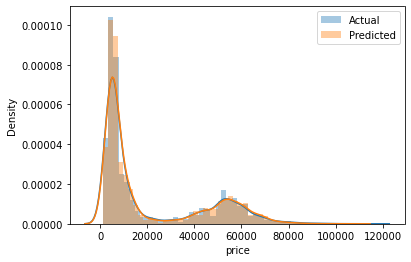

In [53]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()